In [6]:
import datetime as dt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
tw_weighted = pd.read_csv('TSEC_weighted_index.csv', index_col='Date', parse_dates=True) # 2015/04/30 ~ 2019/04/29

In [47]:
tw_weighted.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-30,9841.150391,9894.900391,9820.049805,9820.049805,9820.012695,2644700.0
2015-05-04,9853.509766,9871.650391,9800.480469,9845.040039,9845.002930,2298800.0
2015-05-05,9849.129883,9855.639648,9788.129883,9820.129883,9820.092773,2134800.0
2015-05-06,9780.389648,9829.429688,9735.940430,9818.200195,9818.163086,2353700.0
2015-05-07,9789.820313,9789.820313,9704.110352,9704.110352,9704.073242,2315900.0


In [75]:
tw_weighted_adjclose_volume = tw_weighted[['Adj Close','Volume']] # slice出調整後收盤價跟交易量

In [76]:
tw_weighted_adjclose_volume.head()

,Adj Close,Volume
Date,,
2015-04-30,9820.012695,2644700.0
2015-05-04,9845.002930,2298800.0
2015-05-05,9820.092773,2134800.0
2015-05-06,9818.163086,2353700.0
2015-05-07,9704.073242,2315900.0


In [77]:
sp500 = pd.read_csv('^GSPC.csv',index_col='Date', parse_dates=True) # 2015/04/29 - 2019/04/26

In [78]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-29,2112.489990,2113.649902,2097.409912,2106.850098,2106.850098,4074970000
2015-04-30,2105.520020,2105.520020,2077.590088,2085.510010,2085.510010,4509680000
2015-05-01,2087.379883,2108.409912,2087.379883,2108.290039,2108.290039,3379390000
2015-05-04,2110.229980,2120.949951,2110.229980,2114.489990,2114.489990,3091580000
2015-05-05,2112.629883,2115.239990,2088.459961,2089.459961,2089.459961,3793950000


In [79]:
sp500_adjclose_volume = sp500[['Adj Close','Volume']]

In [80]:
sp500_adjclose_volume.head()

,Adj Close,Volume
Date,,
2015-04-29,2106.850098,4074970000
2015-04-30,2085.510010,4509680000
2015-05-01,2108.290039,3379390000
2015-05-04,2114.489990,3091580000
2015-05-05,2089.459961,3793950000


In [141]:
newdf = pd.merge(tw_weighted_adjclose_volume, sp500_adjclose_volume, on='Date', how='inner')
newdf = newdf.dropna() # drop null value
newdf = newdf.drop(newdf.index[940])

In [143]:
newdf.head()

,Adj Close_x,Volume_x,Adj Close_y,Volume_y
Date,,,,
2015-04-30,9820.012695,2644700.0,2085.510010,4509680000
2015-05-04,9845.002930,2298800.0,2114.489990,3091580000
2015-05-05,9820.092773,2134800.0,2089.459961,3793950000
2015-05-06,9818.163086,2353700.0,2080.149902,3792210000
2015-05-07,9704.073242,2315900.0,2088.000000,3676640000


In [144]:
newdf.tail()

,Adj Close_x,Volume_x,Adj Close_y,Volume_y
Date,,,,
2019-04-18,10962.019531,2.816742e+09,2905.030029,3506850000
2019-04-22,10987.709961,2.054064e+09,2907.969971,2997950000
2019-04-23,11025.679688,1.937303e+09,2933.679932,3635030000
2019-04-24,11027.639648,2.093864e+09,2927.250000,3448960000
2019-04-25,11039.860352,2.137391e+09,2926.169922,3425280000


In [145]:
newdf_for_sp500_shifting = pd.merge(tw_weighted_adjclose_volume, sp500_adjclose_volume, on='Date', how='inner')
newdf_for_sp500_shifting = newdf_for_sp500_shifting.shift(periods=-1)
newdf_for_sp500_shifting = newdf_for_sp500_shifting.dropna() # drop null value

In [146]:
newdf_for_sp500_shifting.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 940 entries, 2015-04-30 to 2019-04-25
Data columns (total 4 columns):
Adj Close_x    940 non-null float64
Volume_x       940 non-null float64
Adj Close_y    940 non-null float64
Volume_y       940 non-null float64
dtypes: float64(4)
memory usage: 36.7 KB


In [147]:
newdf_for_sp500_shifting.head()

,Adj Close_x,Volume_x,Adj Close_y,Volume_y
Date,,,,
2015-04-30,9845.002930,2298800.0,2114.489990,3.091580e+09
2015-05-04,9820.092773,2134800.0,2089.459961,3.793950e+09
2015-05-05,9818.163086,2353700.0,2080.149902,3.792210e+09
2015-05-06,9704.073242,2315900.0,2088.000000,3.676640e+09
2015-05-07,9691.962891,2012000.0,2116.100098,3.399440e+09


In [148]:
newdf_for_sp500_shifting.tail()

,Adj Close_x,Volume_x,Adj Close_y,Volume_y
Date,,,,
2019-04-18,10987.709961,2.054064e+09,2907.969971,2.997950e+09
2019-04-22,11025.679688,1.937303e+09,2933.679932,3.635030e+09
2019-04-23,11027.639648,2.093864e+09,2927.250000,3.448960e+09
2019-04-24,11039.860352,2.137391e+09,2926.169922,3.425280e+09
2019-04-25,10952.469727,2.109398e+09,2939.879883,3.248500e+09


### 目標：利用S&P 500的Adj Close當feature，台股大盤加權指數Adj Close當target

In [169]:
X = newdf_for_sp500_shifting.iloc[:, 2].values # s&p500 adj close price
y = newdf.iloc[:, 0].values # tw weighted index close price

In [170]:
X.shape

(940,)

In [171]:
y.shape

(940,)

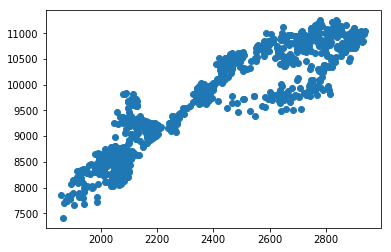

In [172]:
plt.scatter(X,y)

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

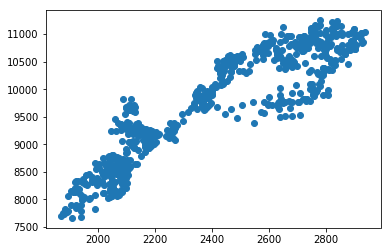

In [175]:
plt.scatter(X_train, y_train)

In [176]:
# Fitting Lineaer Regressioin to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X_train = X_train.reshape(-1,1)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [177]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(degree=2)
pipeline = Pipeline(
    [('poly', poly),('lin reg', lin_reg)]
)

In [178]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lin reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

### 利用S&P 500 polynomial (degree=2) 估計台股大盤指數

In [179]:
X_test = X_test.reshape(-1,1)
y_pred_2 = pipeline.predict(X_test)

Text(0, 0.5, 'TW weighted Index')

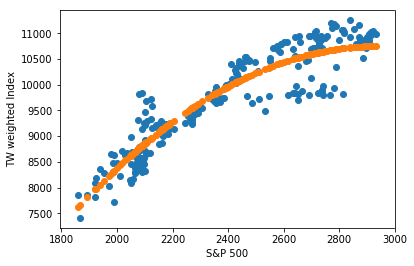

In [189]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_2)
plt.xlabel('S&P 500')
plt.ylabel('TW weighted Index')

In [190]:
print('Prediction score:', pipeline.score(X_train, y_train))

Prediction score: 0.86507832680842


In [191]:
from sklearn.metrics import explained_variance_score

In [192]:
explained_variance_score(y_test, y_pred_2)

0.8610336096636493

In [193]:
from sklearn.metrics import r2_score

In [194]:
r2_score(y_test, y_pred_2)

0.8610126884893277